In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep = '\t')

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [12]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [13]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [14]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['length','punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
import matplotlib.pyplot as plt

(array([3.679e+03, 1.756e+03, 7.600e+01, 3.800e+01, 1.400e+01, 3.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  92.8, 183.6, 274.4, 365.2, 456. , 546.8, 637.6, 728.4,
        819.2, 910. ]),
 <BarContainer object of 10 artists>)

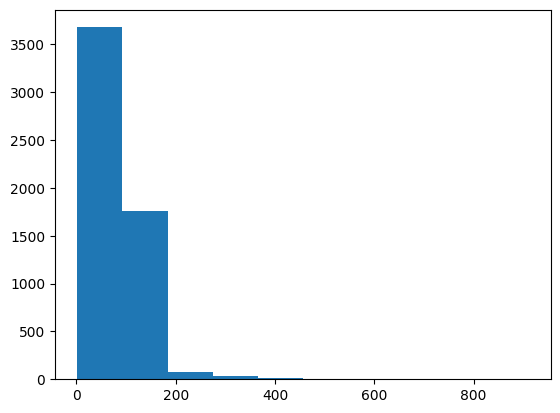

In [21]:
plt.hist(df['length'], bins=10)

In [22]:
X_train.shape

(3900, 2)

In [23]:
X_test.shape, y_test.shape

((1672, 2), (1672,))

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_model = LogisticRegression()

In [26]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
predict = lr_model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
cm = confusion_matrix(y_test, predict)

In [33]:
print(cm)

[[1404   44]
 [ 219    5]]


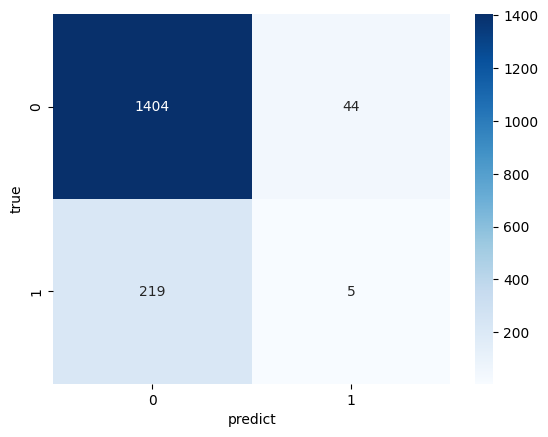

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predict')
plt.ylabel('true')
plt.show()

In [37]:
report = classification_report(y_test, predict)

In [38]:
print(report)

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
nb_model = MultinomialNB()

In [41]:
nb_model.fit(X_train,y_train)

MultinomialNB()

In [42]:
predict = nb_model.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, predict)
print(cm)

[[1438   10]
 [ 224    0]]
